In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Show all columns
pd.set_option('display.max_columns', None)

In [183]:
# Read in the data
teams = pd.read_csv('data/Teams.csv')
# Import data for war
player = pd.read_csv('data/player_stats_2.csv')

In [189]:
def agg_player_to_team_stats(teams, player, cols):
    """
    Creates a new dataframe with the an aggregated WAR score for each team for each year

    Parameters
    ----------
    teams : DataFrame
        DataFrame containing the team information per year
    player : DataFrame
        DataFrame containing the player information such as WAR, salary, height etc.
    cols : list
        List of columns to aggregate in the player dataframe

    Returns
    -------
    DataFrame
        DataFrame containing the aggregated WAR score for each team for each year
    """
    # Filter out by NL
    teams = teams[teams["lgID"] == "NL"]
    # Team columns to keep
    team_cols = ["yearID","franchID", "Rank"]
    teams = teams[team_cols]
    # Rename franchID to teamID
    teams = teams.rename(columns={"franchID": "teamID"})
    
    # Group by team and year and aggregate the cols by mean and ignore the NA values
    team_id_merge = player.groupby(["yearID", "teamID"])[cols].mean().reset_index()

    # Merge teams and team_id_merge
    team_war = pd.merge(teams, team_id_merge, on=["yearID", "teamID"], how="left")

    # Filter out the years before 1985
    team_war = team_war[team_war["yearID"] >= 1985]

    return team_war


# Columns to aggregate 
cols = ["br_WAR_total", "fg_WAR_total"]
team_war = agg_player_to_team_stats(teams, player, cols)
team_war.head()

,yearID,teamID,Rank,br_WAR_total,fg_WAR_total
978,1985,ATL,5,0.298571,0.788889
979,1985,CHC,4,0.772105,0.912821
980,1985,CIN,2,0.811333,1.296774
981,1985,HOU,3,0.395333,0.863889
982,1985,LAD,1,1.446154,1.400000


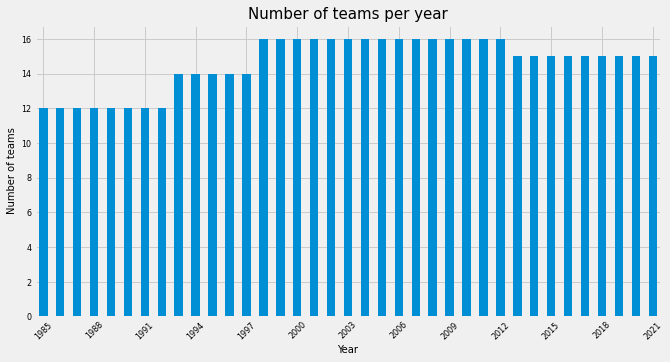

In [197]:
### Plot the number of teams per year ###
# Set plot size
plt.figure(figsize=(10,5))
# Plot value_counts(yearID) as a bar plot and sort by yearID
team_war.value_counts("yearID").sort_index().plot(kind="bar")
# Set style to fivethirtyeight
plt.style.use('fivethirtyeight')
# Make x-axis readable
plt.xticks(rotation=45)
# Show only 15 x-ticks
plt.locator_params(axis='x', nbins=15)
# Add a title
plt.title("Number of teams per year", fontsize=15)
# Add y-label
plt.ylabel("Number of teams", fontsize=10)
# Add x-label
plt.xlabel("Year", fontsize=10)
# x-axis ticks fontsize
plt.xticks(fontsize=8)
# y-axis ticks fontsize
plt.yticks(fontsize=8)
# Show the plot
#plt.show()

# Write the plot to a file
plt.savefig("viz/number_of_teams_per_year.png")

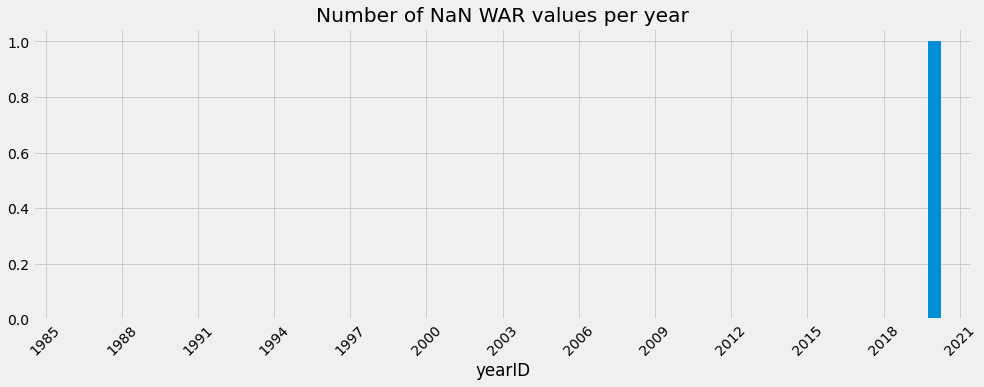

In [198]:
# Plot number of NaN WAR values per year
team_war.groupby("yearID")["br_WAR_total"].apply(lambda x: x.isna().sum()).plot(kind="bar", figsize=(15,5))
plt.title("Number of NaN WAR values per year")
# Set style to fivethirtyeight
plt.style.use('fivethirtyeight')
# Make x-axis readable
plt.xticks(rotation=45)
# Show only 15 x-ticks

plt.locator_params(axis='x', nbins=15)
plt.show()